In [3]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from scipy.stats import skew
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
%matplotlib inline


In [4]:
data = pd.read_csv("/home/jason/Desktop/DataScience/bank-additional/bank-additional/bank-additional-full.csv", sep = ";")
display(data.head())

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
# Clean up column names
data.columns = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 
                'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
                'cons_conf_idx', 'euribor3m', 'nr_employed', 'y']


# Convert target variables to integers
data = data.replace({"y" : {"no" : 0, "yes" : 1}})

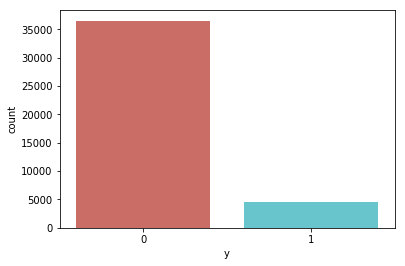

In [6]:
data['y'].describe()

sns.countplot(x='y', data=data, palette='hls')
plt.show()

In [7]:
data.groupby('y').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
y,,,,,,,,,,
0,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
1,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


In [8]:
pd.crosstab(data.job,dataset.y).plot(kind='bar')
plt.title('Purchase Frequency by Job')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')

NameError: name 'dataset' is not defined

In [9]:
table=pd.crosstab(data.marital,dataset.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Marital Status vs Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')

NameError: name 'dataset' is not defined

In [10]:
table=pd.crosstab(data.education,dataset.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Education vs Purchase')
plt.xlabel('Education')
plt.ylabel('Proportion of Customers')

NameError: name 'dataset' is not defined

In [11]:
pd.crosstab(data.day_of_week,dataset.y).plot(kind='bar')
plt.title('Purchase Frequency for Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Frequency of Purchase')

NameError: name 'dataset' is not defined

In [12]:
pd.crosstab(data.month,dataset.y).plot(kind='bar')
plt.title('Purchase Frequency for Month')
plt.xlabel('Month')
plt.ylabel('Frequency of Purchase')

NameError: name 'dataset' is not defined

Text(0,0.5,'Frequency')

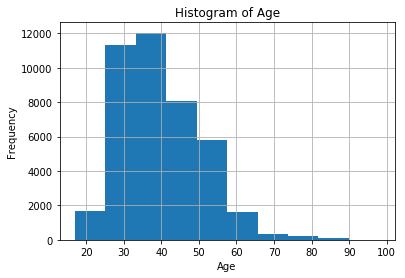

In [13]:
data.age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

In [14]:
pd.crosstab(data.poutcome,dataset.y).plot(kind='bar')
plt.title('Purchase Frequency for Poutcome')
plt.xlabel('Poutcome')
plt.ylabel('Frequency of Purchase')

NameError: name 'dataset' is not defined

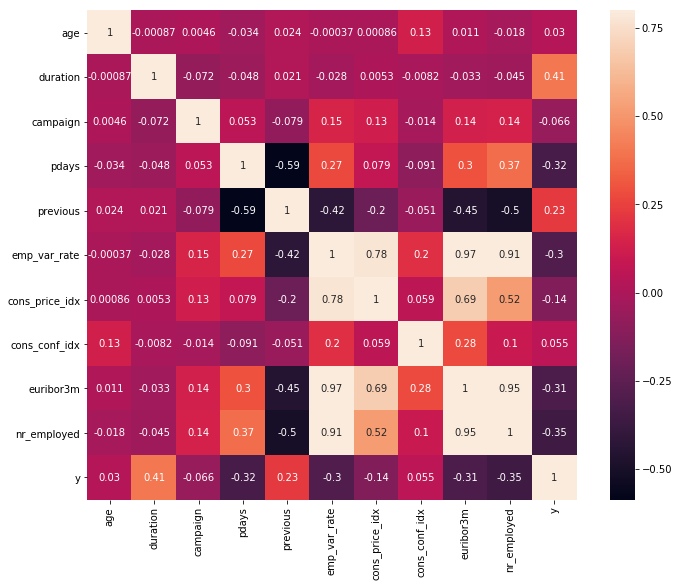

In [15]:
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True, annot=True);


In [55]:
# We can see from the correlation plot that there is a possibility of high multicollinearity between emp_var_rate,
# nr_employed, and euribor3m.

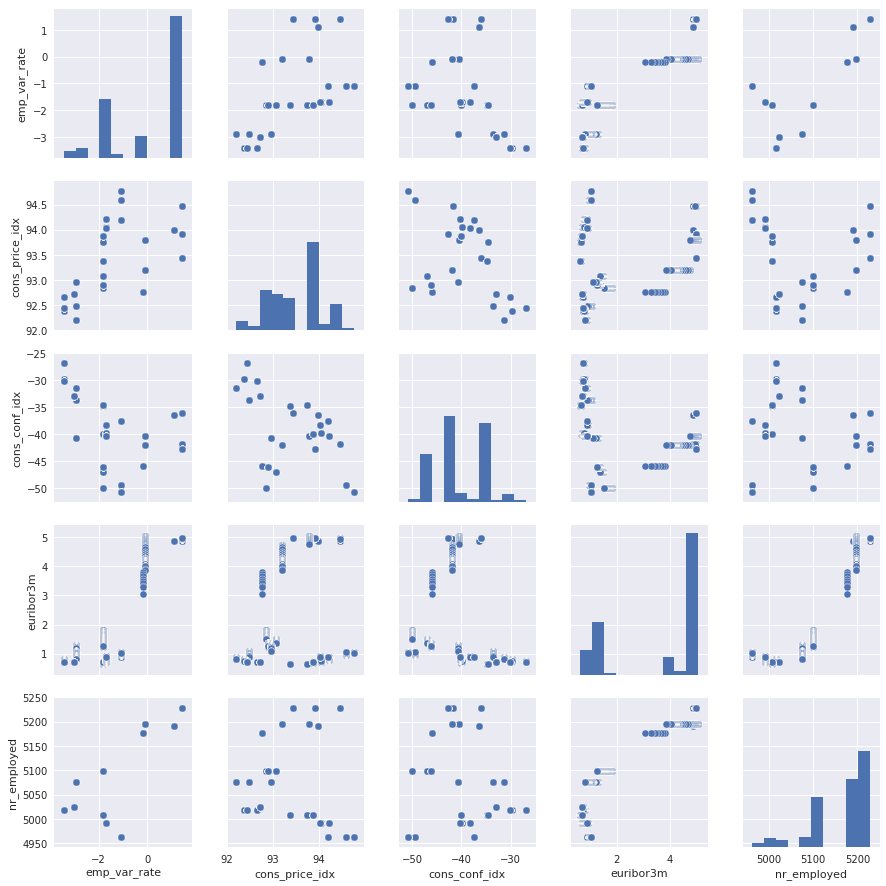

In [16]:
#scatterplot
sns.set()
cols = ['emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed']
sns.pairplot(data[cols], size = 2.5)
plt.show();

In [17]:
# Check missing data

total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
y,0,0.0
day_of_week,0,0.0
job,0,0.0
marital,0,0.0
education,0,0.0
default,0,0.0
housing,0,0.0
loan,0,0.0
contact,0,0.0
month,0,0.0


In [18]:
# Encode education as ordinal
data['education']=np.where(data['education'] =='basic.9y', 'Basic', data['education'])
data['education']=np.where(data['education'] =='basic.6y', 'Basic', data['education'])
data['education']=np.where(data['education'] =='basic.4y', 'Basic', data['education'])

# 1 : not working, 2 : working
data["working"] = data.job.replace({"retired" : 1, "student" : 1, "unemployed" : 1,
                                    "admin." : 2, "blue-collar" : 2, "entrepreneur" : 2, "housemaid" : 2, 
                                    "management" : 2, "self-employed" : 2, "services" : 2, "technician" : 2
                                   })
# 1 : winter, 2 : spring, 3 : summer, 4 : fall
data["season"] = data.month.replace({"dec" : 1, "jan" : 1, "feb" : 1,
                                        "mar" : 2, "apr" : 2, "may" : 2, 
                                        "jun" : 3, "jul" : 3, "aug" : 3,
                                        "sep" : 4, "oct" : 4, "nov" : 4
                                   })


In [19]:
data['pdays'].describe()

count    41188.000000
mean       962.475454
std        186.910907
min          0.000000
25%        999.000000
50%        999.000000
75%        999.000000
max        999.000000
Name: pdays, dtype: float64

In [56]:
# since most of the data is 999, or not contacted, we will create new variables to replace pdays.
data["pdaysordinal"] = data.pdays.copy()
data.loc[data["pdays"] == 999, "pdaysordinal"] = 1 # never contacted
data.loc[data["pdays"] < 7, "pdaysordinal"] = 2 # contacted less than a week ago
data.loc[(data["pdays"] >= 7) & (data["pdays"] < 14), "pdaysordinal"] = 3 # contacted less than 2 weeks ago
data.loc[data["pdays"] >= 14, "pdaysordinal"] = 4 # contacted less than 2 weeks ago
data = data.drop(columns='pdays')

AttributeError: 'DataFrame' object has no attribute 'pdays'

Text(0,0.5,'Frequency of Purchase')

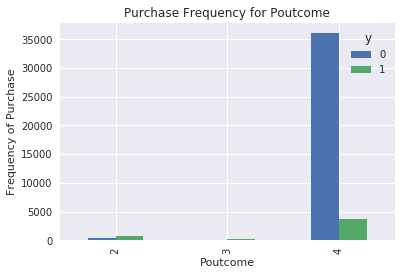

In [21]:
pd.crosstab(data.pdaysordinal,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Poutcome')
plt.xlabel('Poutcome')
plt.ylabel('Frequency of Purchase')

In [22]:
print(data.shape)
display(data.head())

(41188, 23)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y,working,season,pdaysordinal
0,56,housemaid,married,Basic,no,no,no,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,2,2,4
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,2,2,4
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,2,2,4
3,40,admin.,married,Basic,no,no,no,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,2,2,4
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,2,2,4


In [32]:
data.head()

y = data.loc[:, 'y'].values

In [33]:
X = data.drop(columns='y')
X = pd.get_dummies(X)
X.head()

,age,duration,campaign,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,season,...,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,working_1,working_2,working_unknown
0,56,261,1,0,1.1,93.994,-36.4,4.857,5191.0,2,...,1,0,0,0,0,1,0,0,1,0
1,57,149,1,0,1.1,93.994,-36.4,4.857,5191.0,2,...,1,0,0,0,0,1,0,0,1,0
2,37,226,1,0,1.1,93.994,-36.4,4.857,5191.0,2,...,1,0,0,0,0,1,0,0,1,0
3,40,151,1,0,1.1,93.994,-36.4,4.857,5191.0,2,...,1,0,0,0,0,1,0,0,1,0
4,56,307,1,0,1.1,93.994,-36.4,4.857,5191.0,2,...,1,0,0,0,0,1,0,0,1,0


In [35]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

rfe = RFE(logreg, 15)
rfe = rfe.fit(X, y )
print(rfe.support_)
print(rfe.ranking_)

[False False False False False False False  True False False  True False
 False False False False  True False False  True False False False False
 False False False False False False False False False False  True False
 False False False False False False  True  True  True  True False False
 False  True  True  True False False False  True False False False  True
 False  True False False False]
[41 39 16 38 14 18 22  1 33 28  1 12  2 32 50 45  1 37  3  1 15 42 46 13 17
 31 48 24 25 43 34 10  6 20  1 51 40 35 44 29 36 23  1  1  1  1 19  8  5  1
  1  1 49  7 11  1 27 26  9  1  4  1 21 30 47]


In [36]:
# We create an empty vector to filter through rfe.ranking_ to select the variables that were chosen by RFE

item = []
for i in range(65):
    if rfe.ranking_[i] == 1:
        item.append(i)
        
final = X.iloc[:,item]

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Split the data for linear regression based on feature selection results
X_train_lr, X_test_lr, y_train, y_test = train_test_split(final, y, test_size = 0.2, random_state = 0)

In [39]:
logreg.fit(X_train_lr, y_train)
y_pred_lr1 = logreg.predict(X_test_lr)
print('Logistic Regression acururacy: %f'  % accuracy_score(y_test,y_pred_lr1))

Logistic Regression acururacy: 0.900340


In [41]:
logreg.fit(X_train, y_train)
y_pred_lr = logreg.predict(X_test)
print('Logistic Regression acururacy: %f'  % accuracy_score(y_test,y_pred_lr))

Logistic Regression acururacy: 0.915392


In [42]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = cross_val_score(modelCV, X_train_lr, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %f" % (results.mean()))

10-fold cross validation average accuracy: 0.899514


In [43]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred_lr)
print(confusion_matrix)

[[7119  200]
 [ 497  422]]


In [44]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_lr))

             precision    recall  f1-score   support

          0       0.93      0.97      0.95      7319
          1       0.68      0.46      0.55       919

avg / total       0.91      0.92      0.91      8238



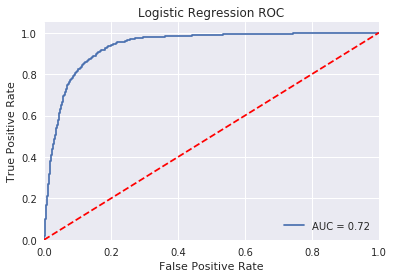

In [45]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC = %0.2f' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC')
plt.legend(loc="lower right")
plt.show()

In [46]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print('KNN acururacy: %f' % accuracy_score(y_test,y_pred_knn))
print(classification_report(y_test, y_pred_knn))

KNN acururacy: 0.905195
             precision    recall  f1-score   support

          0       0.94      0.96      0.95      7319
          1       0.59      0.48      0.53       919

avg / total       0.90      0.91      0.90      8238



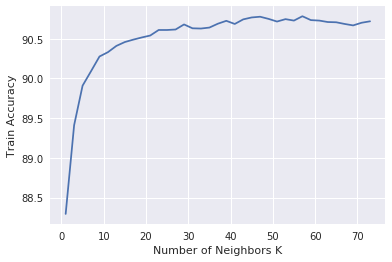

In [47]:
# Creating a list of odd values for k in KNN
neighbors = list(range(1,75,2))

# empty list to hold the cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors = k, metric = 'minkowski', p = 2)
    kfold = KFold(n_splits=10)
    scores = cross_val_score(knn, X_train, y_train, cv=kfold, scoring='accuracy')
    cv_scores.append(scores.mean()*100)


plt.plot(neighbors, cv_scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Train Accuracy')
plt.show()

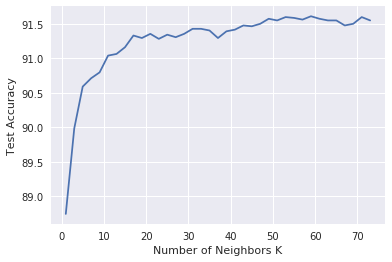

In [48]:
# Creating a list of odd values for k in KNN
neighbors = list(range(1,75,2))

# empty list to hold the cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors = k, metric = 'minkowski', p = 2)
    kfold = KFold(n_splits=10)
    scores = cross_val_score(knn, X_test, y_test, cv=kfold, scoring='accuracy')
    cv_scores.append(scores.mean()*100)


plt.plot(neighbors, cv_scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Test Accuracy')
plt.show()

In [49]:
knn = KNeighborsClassifier(n_neighbors = 59, metric = 'minkowski', p = 2)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print('KNN acururacy: %f' % accuracy_score(y_test,y_pred_knn))

KNN acururacy: 0.914178


In [50]:
# Fitting Kernel SVM to the Training set
from sklearn.svm import SVC
ksvc = SVC(kernel = 'rbf', random_state = 0)
ksvc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [51]:
# Predicting the Test set results
y_pred_svc = ksvc.predict(X_test)
print('Kernel SVM Classifier acururacy: %f' % accuracy_score(y_test,y_pred_svc))
# Making the Confusion Matrix

Kernel SVM Classifier acururacy: 0.898398


In [52]:
kfold = KFold(n_splits=10, random_state=7)
scoring = 'accuracy'
results = cross_val_score(ksvc, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %f" % (results.mean()))

10-fold cross validation average accuracy: 0.896601


In [53]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print('Random Forrest Classifier acururacy: %f' % accuracy_score(y_test,y_pred_rf))

Random Forrest Classifier acururacy: 0.910901


In [54]:
kfold = KFold(n_splits=10, random_state=7)
scoring = 'accuracy'
results = cross_val_score(randomforrest, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %f" % (results.mean()))

NameError: name 'randomforrest' is not defined

In [ ]:
from xgboost import XGBClassifier
from xgboost import plot_tree
from xgboost import plot_importance
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)
print('Random Forrest Classifier accuracy: %f' % accuracy_score(y_test,y_pred_xgb))

In [ ]:
plot_tree(xgb)
plot_importance(xgb)
plt.show()

In [ ]:
print("The most accurate models are logistic regression and XGBoost")